In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [77]:
df = pd.read_csv('./dataset/Crimes_2011_to_present.csv', header='infer', delimiter=',', 
                 error_bad_lines=False, index_col=False, engine='python', infer_datetime_format=True)

In [80]:
df['District'] = pd.to_numeric(df['District'], errors='coerce')

In [86]:
df = df[df['District'].notnull()]

In [89]:
df.drop('Location', axis=1, inplace=True)

In [90]:
df.head()

,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,District,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude
0,10060004,HY248774,2015-05-05,010XX W 79TH ST,0460,BATTERY,SIMPLE,SIDEWALK,false,false,...,6.0,17,71,08B,1170778.0,1852475,2015.0,05/12/2015 12:42:01 PM,41.75066697,-87.649760051
1,10059982,HY248801,2015-05-05,105XX S WABASH AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,false,false,...,5.0,9,49,04B,1178485.0,1834909,2015.0,05/12/2015 12:42:01 PM,41.702292131,-87.622049984
2,10059953,HY248791,2015-05-05,005XX N ASHLAND AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,...,13.0,26,24,18,1165594.0,1903713,2015.0,05/12/2015 12:42:01 PM,41.891381064,-87.66730127
3,10060015,HY248790,2015-05-05,005XX N MARSHFIELD AVE,0275,CRIM SEXUAL ASSAULT,ATTEMPT AGG: OTHER,ALLEY,false,false,...,13.0,26,24,02,1165337.0,1903842,2015.0,05/12/2015 12:42:01 PM,41.89174052,-87.668241434
4,10059944,HY248782,2015-05-05,0000X E 72ND ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,true,false,...,3.0,6,69,18,1178073.0,1857256,2015.0,05/12/2015 12:42:01 PM,41.763624424,-87.622883163


In [92]:
dummy = pd.get_dummies(df['Primary.Type'])

In [96]:
dummy.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION'],
      dtype='object')

In [158]:
new_df = pd.concat([df, dummy])

In [94]:
new_df.head()

,ARSON,ASSAULT,Arrest,BATTERY,BURGLARY,Beat,Block,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,...,ROBBERY,SEX OFFENSE,STALKING,THEFT,Updated.On,WEAPONS VIOLATION,Ward,X.Coordinate,Y.Coordinate,Year
0,NaN,NaN,false,NaN,NaN,612,010XX W 79TH ST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,17,1170778.0,1852475,2015.0
1,NaN,NaN,false,NaN,NaN,512,105XX S WABASH AVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,9,1178485.0,1834909,2015.0
2,NaN,NaN,true,NaN,NaN,1215,005XX N ASHLAND AVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,26,1165594.0,1903713,2015.0
3,NaN,NaN,false,NaN,NaN,1215,005XX N MARSHFIELD AVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,26,1165337.0,1903842,2015.0
4,NaN,NaN,true,NaN,NaN,323,0000X E 72ND ST,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,05/12/2015 12:42:01 PM,NaN,6,1178073.0,1857256,2015.0


In [95]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595608 entries, 0 to 1346118
Data columns (total 54 columns):
ARSON                                float64
ASSAULT                              float64
Arrest                               object
BATTERY                              float64
BURGLARY                             float64
Beat                                 object
Block                                object
CONCEALED CARRY LICENSE VIOLATION    float64
CRIM SEXUAL ASSAULT                  float64
CRIMINAL DAMAGE                      float64
CRIMINAL TRESPASS                    float64
Case.Number                          object
Community.Area                       object
DECEPTIVE PRACTICE                   float64
Date                                 object
Description                          object
District                             float64
Domestic                             object
FBI.Code                             object
GAMBLING                             floa

In [116]:
new_df[['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION', 'District']].head()

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,District
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


# Clustering

In [122]:
from sklearn.cluster import KMeans

In [98]:
kmeans = KMeans(n_clusters=3)

In [118]:
kmeans.fit(new_df[['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION', 'District']].fillna(0))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Regression

## EDA

In [141]:
new_df['District'].value_counts()[:10]

11.0    88986
8.0     88055
4.0     77307
7.0     77280
6.0     76814
25.0    76601
3.0     67842
9.0     65300
12.0    59756
19.0    58894
15.0    58669
5.0     58319
10.0    57748
Name: District, dtype: int64

In [145]:
vc = new_df['District'].value_counts()[:10]

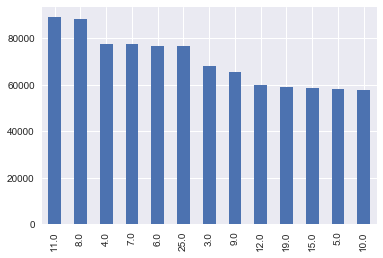

In [146]:
vc.plot(kind='bar')
plt.xticks()
plt.show()

In [155]:
new_df.columns

Index(['ARSON', 'ASSAULT', 'Arrest', 'BATTERY', 'BURGLARY', 'Beat', 'Block',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'Case.Number', 'Community.Area',
       'DECEPTIVE PRACTICE', 'Date', 'Description', 'District', 'Domestic',
       'FBI.Code', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING', 'ID',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'IUCR',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'Latitude',
       'Location.Description', 'Longitude', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'Primary.Type', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'Updated.On', 'WEAPONS VIOLATION', 'Ward',
       'X.Coordinate', 'Y.Coordinate', 'Year'],
      dtype='obje

In [161]:
new_df['Year'] = pd.to_numeric(new_df['Year'], errors='coerce')

In [162]:
new_df = new_df[new_df['Year'].notnull()]

### ...